In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #adaptive learning method algo 
from keras.utils.np_utils import to_categorical #to deal with categorical features
from sklearn import datasets #to create datasets using blobs

/home/valentin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/valentin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# binary classification

Create 2 classes of points

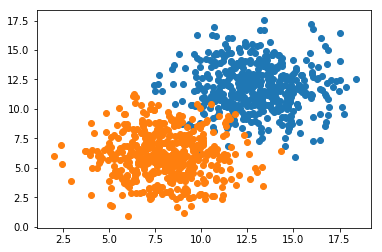

In [7]:
### n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

# training data
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Creating NN and adding layers

Optimization algo
* batch gradient descent : intensive, slow
* stochastic gradient descent 
* adam = adagrad & RMSprop : very efficient

Trade-off : resolution, speed of convergence <= choosing learning rate (auto with ADAM)

Compiling model, specify:
1. optimizer
2. error function
3. metrics => judge performance at every epoch

Training
1. define batch size, trade-off: big=computer can handle, too big=degradation of accuracy
2. define nb of epoch, tradeoff not enough: underfitting, too much=overfitting
3. shuffle data : avoid being stuck at a local minimum

In [14]:
model=Sequential()
model.add(Dense(units=1,input_shape=(2,),activation="sigmoid"))
adam=Adam(lr=0.1)
model.compile(adam,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(x=X,y=y,
          verbose=1,
          batch_size=50,
         epochs=40,
         shuffle="true") # start training

Epoch 1/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.8184 - acc: 0.5310
Epoch 2/40
1000/1000 [==============================] - 0s 135us/step - loss: 0.5180 - acc: 0.7460
Epoch 3/40
1000/1000 [==============================] - 0s 124us/step - loss: 0.4317 - acc: 0.8530
Epoch 4/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.3675 - acc: 0.8820
Epoch 5/40
1000/1000 [==============================] - 0s 99us/step - loss: 0.3187 - acc: 0.9180
Epoch 6/40
1000/1000 [==============================] - 0s 97us/step - loss: 0.2799 - acc: 0.9380
Epoch 7/40
1000/1000 [==============================] - 0s 96us/step - loss: 0.2491 - acc: 0.9480
Epoch 8/40
1000/1000 [==============================] - 0s 123us/step - loss: 0.2362 - acc: 0.9490
Epoch 9/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.2157 - acc: 0.9580
Epoch 10/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.1943 - acc: 0.9620
Epoch 11/40
10

In [11]:
# comparing with sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
nn=MLPClassifier().fit(X,y);nn.score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.977

In [31]:
et=ExtraTreesClassifier().fit(X,y);et.score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/valentin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


1.0

Text(0, 0.5, 'accuracy')

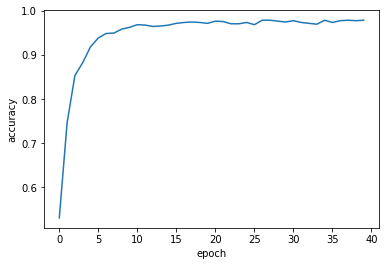

In [17]:
plt.plot(history.history["acc"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

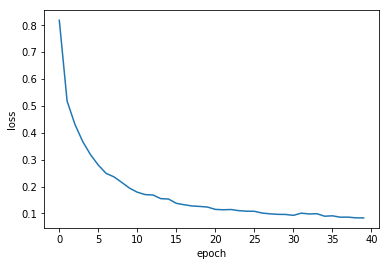

In [18]:
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [27]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred=model.predict(grid)
    z=pred.reshape(xx.shape)
    plt.contourf(xx,yy,z)

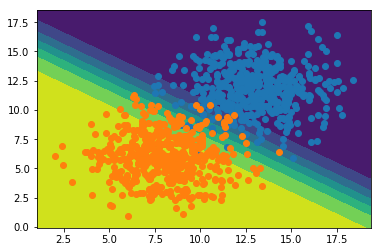

In [29]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

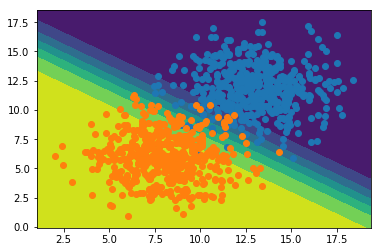

In [32]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

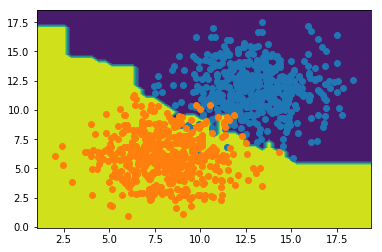

In [33]:
plot_decision_boundary(X,y,et)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

# Multiclass classification

In [2]:
# creating 5 classes using blobs

In [33]:
nb_pts=500
centers=[
    [-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]
]

X,y=datasets.make_blobs(n_samples=nb_pts,
                       random_state=3,
                       centers=centers,
                       cluster_std=0.4)

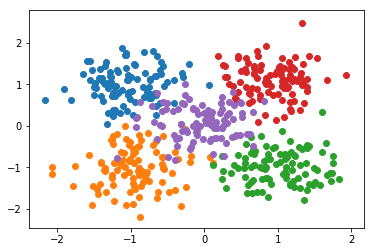

In [34]:
for val in [0,1,2,3,4]:
    plt.scatter(X[y==val,0],X[y==val,1])

In [35]:
# dealing with categorical value (try without)
y_cat=to_categorical(y)
y

array([1, 0, 2, 0, 2, 1, 3, 2, 1, 4, 2, 3, 3, 2, 2, 1, 3, 0, 3, 1, 2, 0,
       1, 1, 4, 0, 2, 4, 4, 0, 3, 2, 3, 3, 4, 2, 2, 3, 0, 4, 1, 4, 1, 0,
       2, 2, 2, 1, 3, 3, 3, 0, 2, 1, 2, 1, 2, 4, 1, 3, 0, 1, 2, 3, 3, 0,
       4, 0, 4, 2, 4, 0, 0, 4, 0, 2, 1, 4, 1, 2, 2, 3, 0, 1, 0, 1, 0, 2,
       4, 3, 0, 0, 1, 3, 4, 1, 4, 1, 2, 1, 2, 3, 3, 0, 1, 1, 0, 4, 4, 1,
       4, 3, 0, 2, 2, 3, 1, 4, 3, 4, 3, 2, 1, 1, 2, 4, 2, 2, 1, 4, 1, 3,
       3, 0, 1, 3, 4, 3, 4, 4, 2, 1, 3, 3, 1, 4, 2, 0, 0, 4, 1, 1, 0, 3,
       4, 0, 2, 0, 3, 0, 0, 0, 4, 3, 0, 2, 0, 4, 2, 1, 4, 1, 3, 2, 0, 4,
       3, 0, 2, 1, 2, 0, 4, 4, 2, 3, 0, 1, 4, 4, 3, 4, 0, 0, 3, 2, 4, 3,
       2, 2, 3, 4, 3, 0, 1, 4, 3, 3, 4, 1, 4, 3, 0, 3, 1, 3, 1, 2, 0, 1,
       1, 3, 0, 3, 0, 1, 2, 1, 0, 0, 2, 3, 3, 1, 1, 0, 0, 3, 4, 2, 4, 3,
       4, 2, 4, 3, 4, 2, 0, 2, 3, 0, 2, 3, 4, 1, 2, 2, 2, 4, 4, 4, 1, 0,
       0, 4, 1, 1, 3, 1, 4, 1, 2, 2, 3, 3, 0, 3, 3, 2, 0, 3, 1, 0, 1, 4,
       1, 1, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1, 0, 4, 3,

In [36]:
# creating NN
model=Sequential()
model.add(Dense(5,input_shape=(2,),activation="softmax"))
model.compile(Adam(lr=0.1),
             "categorical_crossentropy",
             metrics=["accuracy"])

In [37]:
history=model.fit(X,y_cat,
                 verbose=1,
                 batch_size=50,
                 epochs=60)

Epoch 1/60
500/500 [==============================] - 1s 2ms/step - loss: 1.0941 - acc: 0.6180
Epoch 2/60
500/500 [==============================] - 0s 87us/step - loss: 0.5521 - acc: 0.8700
Epoch 3/60
500/500 [==============================] - 0s 122us/step - loss: 0.3829 - acc: 0.9280
Epoch 4/60
500/500 [==============================] - 0s 102us/step - loss: 0.3124 - acc: 0.9320
Epoch 5/60
500/500 [==============================] - 0s 111us/step - loss: 0.2736 - acc: 0.9380
Epoch 6/60
500/500 [==============================] - 0s 120us/step - loss: 0.2536 - acc: 0.9380
Epoch 7/60
500/500 [==============================] - 0s 116us/step - loss: 0.2374 - acc: 0.9380
Epoch 8/60
500/500 [==============================] - 0s 99us/step - loss: 0.2274 - acc: 0.9380
Epoch 9/60
500/500 [==============================] - 0s 107us/step - loss: 0.2178 - acc: 0.9400
Epoch 10/60
500/500 [==============================] - 0s 112us/step - loss: 0.2118 - acc: 0.9440
Epoch 11/60
500/500 [============

In [38]:
    def plot_multiclass_decision_boundary(X, y, model):
        x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
        y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
        xx, yy = np.meshgrid(x_span, y_span)
        grid = np.c_[xx.ravel(), yy.ravel()]
        pred_func = model.predict_classes(grid)
        z = pred_func.reshape(xx.shape)
        plt.contourf(xx, yy, z)

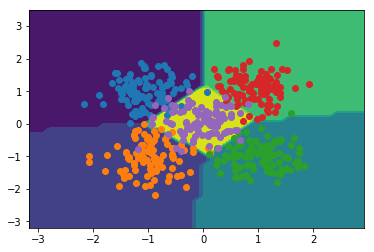

In [40]:
plot_multiclass_decision_boundary(X,y,model)
for val in [0,1,2,3,4]:
    plt.scatter(X[y==val,0],X[y==val,1])

In [41]:
# comparing with sklearn

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
ExtraTreesClassifier().fit(X,y).score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [44]:
MLPClassifier().fit(X,y).score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.944

In [49]:
RandomForestClassifier().fit(X,y).score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.99

In [50]:
AdaBoostClassifier().fit(X,y).score(X,y)

0.698

In [52]:
SVC().fit(X,y).score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.944